In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import math


#attributes normalisation
from scipy.stats import boxcox

#encoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


#balancing target variable
from imblearn.over_sampling import SMOTE

#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('data/loan_approval_prediction.csv')

In [94]:
# Exploratory Data Analysis 
# Data scrubbing
# Plotting features
# Analysing relationships between features and target variable
# Choosing features
# Data Normalization

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
# As per additional research we figured out that the currency is Indian Rupees (INR).

In [6]:
# Remove leading and trailing spaces from all values in all columns

df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [7]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
# Removing space in the column names

df.columns = df.columns.str.replace(' ', '')

In [9]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [10]:
df.shape

(4269, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [12]:
# Checking nulls. Null values in residential_assests_value

df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [13]:
# Checking nan values
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [14]:
# Removing uload_id column

data = df.drop(["loan_id"], axis = 1)

In [15]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

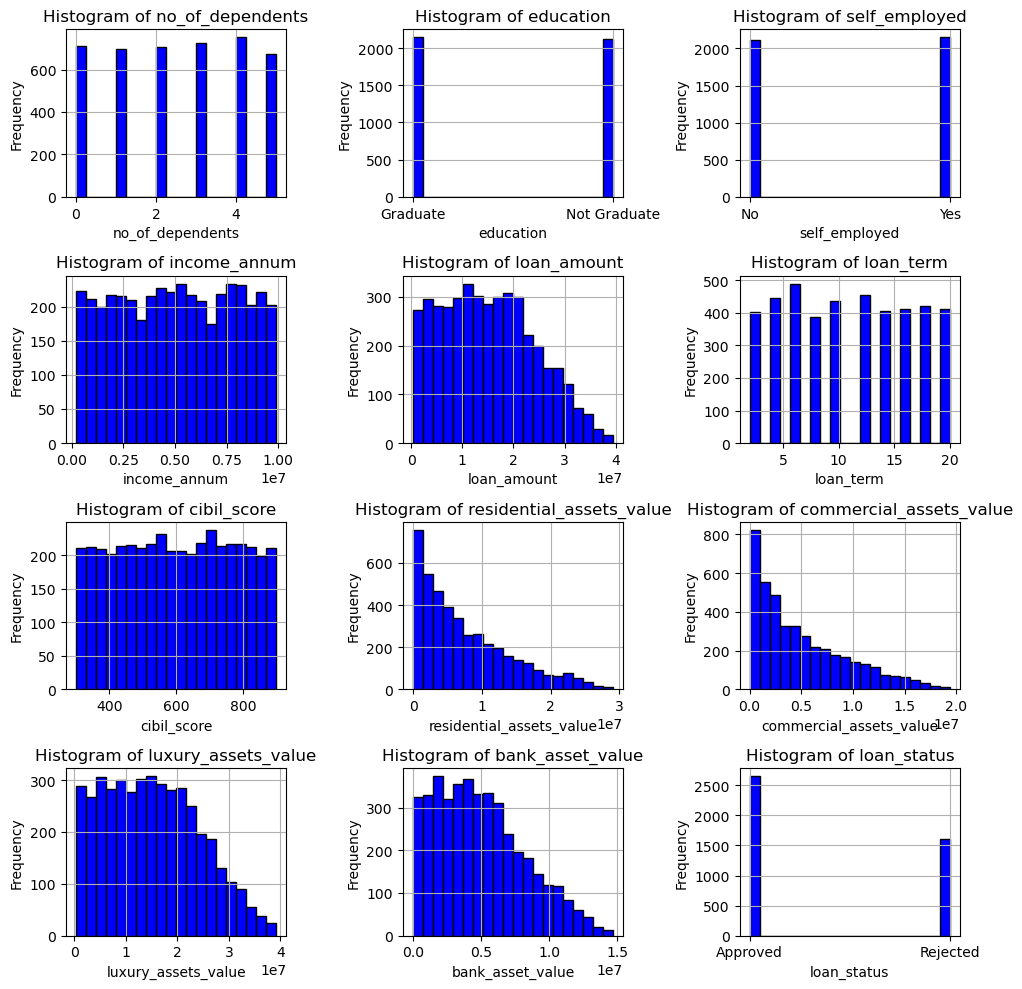

In [16]:
# Buiding a histogram to look at the distribution

variables = ['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status']


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))


axes = axes.flatten()


for i, var in enumerate(variables):
    axes[i].hist(data[var], bins=20, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)


plt.tight_layout()
plt.show()


# There are definitely categorical values like no_of_dependents, education, self_employed, loan_term, cibil_score, loan_status.
# Numuerical values are income_annum, loan_amount, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_assets_value

In [17]:
# These are numerical fatures

num_features = ['income_annum', 'loan_amount', 
                        'residential_assets_value', 
                        'commercial_assets_value', 'luxury_assets_value', 
                        'bank_asset_value']

In [18]:
# Numerical features stats

summary_stats = data[num_features].describe()
summary_stats

,income_annum,loan_amount,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,5.059124e+06,1.513345e+07,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,2.806840e+06,9.043363e+06,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,2.000000e+05,3.000000e+05,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,2.700000e+06,7.700000e+06,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,5.100000e+06,1.450000e+07,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,7.500000e+06,2.150000e+07,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,9.900000e+06,3.950000e+07,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


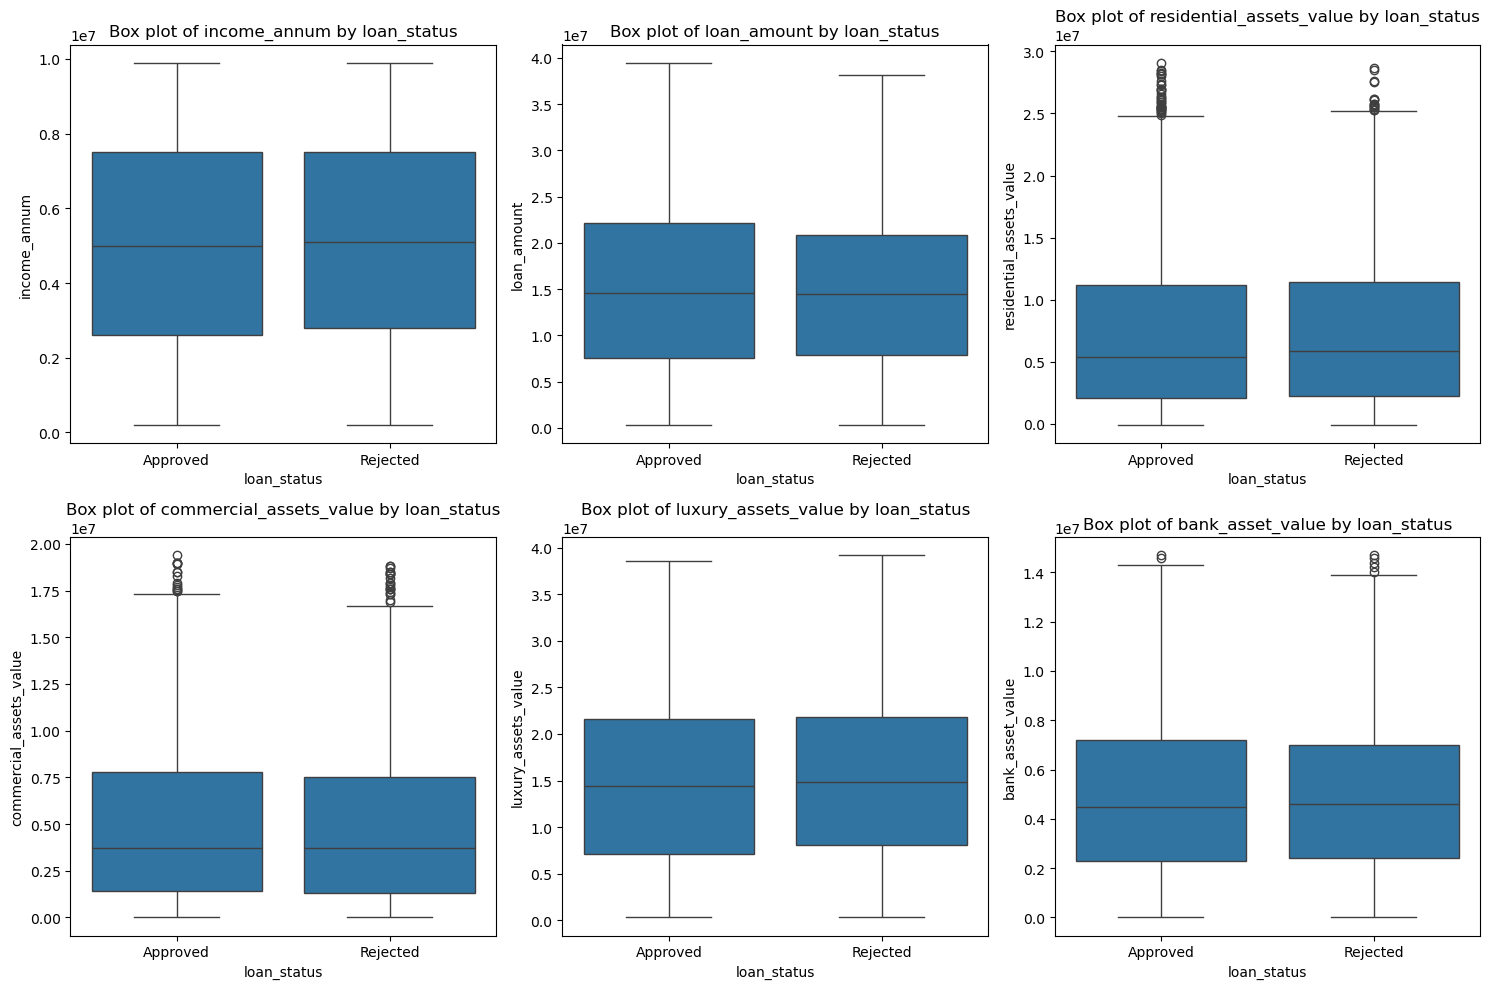

In [19]:
# Looking at the box plots of the numerical features


plt.figure(figsize=(15, 10))

# Loop through each numerical feature and create a box plot
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i + 1) 
    sns.boxplot(x='loan_status', y=feature, data=data)
    plt.title(f'Box plot of {feature} by loan_status')

plt.tight_layout()
plt.show()

# We can definitely see the outliers at residential_assets_value, commercial_assets_value, bank_assets_value

<Axes: xlabel='bank_asset_value', ylabel='Count'>

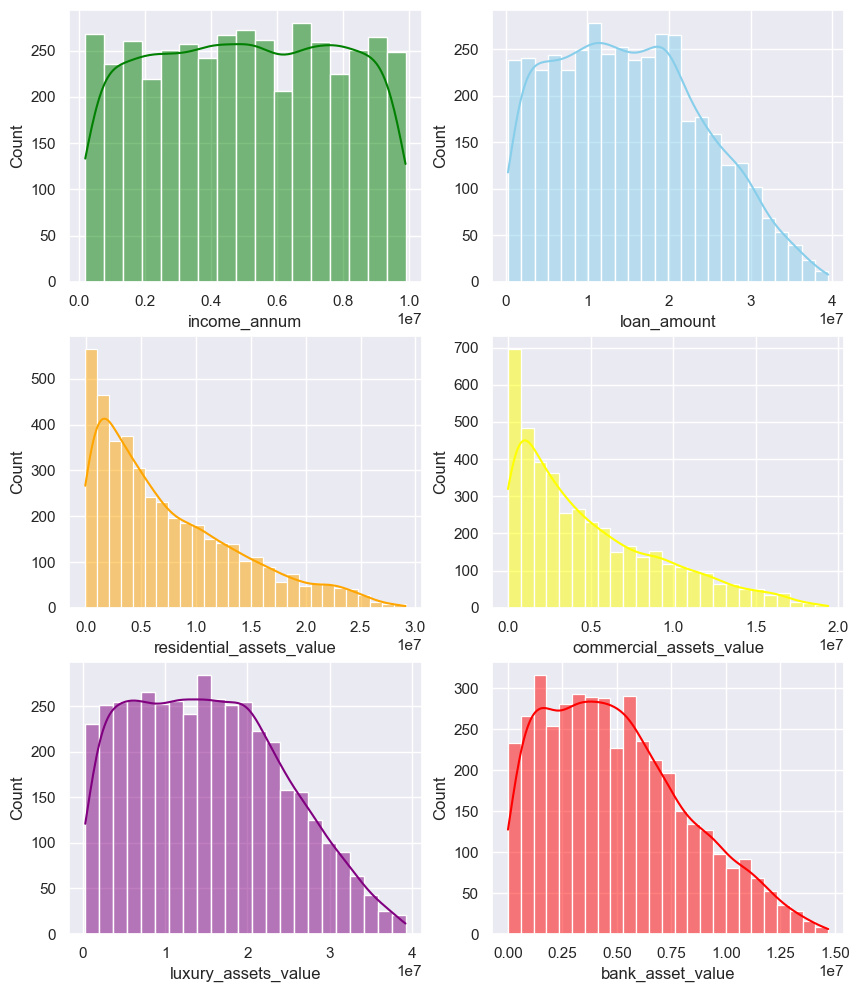

In [20]:
# Histogram distribution of numerical values

sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

sns.histplot(data=data, x="income_annum", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="loan_amount", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="residential_assets_value", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=data, x="commercial_assets_value", kde=True, ax=axs[1, 1], color='yellow')
sns.histplot(data=data, x="luxury_assets_value", kde=True, ax=axs[2, 0], color='purple')
sns.histplot(data=data, x="bank_asset_value", kde=True, ax=axs[2, 1], color='red')


# Most of the numerical values are positively skewed

In [21]:
# Getting rid of outliers 

from scipy.stats import zscore
# Calculate Z-scores for variales

data['zscore_residential_assets_value'] = zscore(data['residential_assets_value'])
data['zscore_commercial_assets_value'] = zscore(data['commercial_assets_value'])
data['zscore_bank_asset_value'] = zscore(data['bank_asset_value'])

# Define a threshold for Z-scores (commonly set to 3)
threshold = 3

# Filter out outliers based on the threshold
clean_data = data[(abs(data['zscore_residential_assets_value']) <= threshold) & (abs(data['zscore_commercial_assets_value']) <= threshold) & (abs(data['zscore_bank_asset_value']) <= threshold) ]


clean_data = clean_data.drop(columns=['zscore_residential_assets_value', 'zscore_commercial_assets_value', 'zscore_bank_asset_value'])
clean_data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4236.000000,4.236000e+03,4.236000e+03,4236.000000,4236.000000,4.236000e+03,4.236000e+03,4.236000e+03,4.236000e+03
mean,2.497403,5.023489e+06,1.502172e+07,10.892823,600.034466,7.364330e+06,4.902951e+06,1.502882e+07,4.941313e+06
std,1.695258,2.788383e+06,8.976516e+06,5.710434,172.316290,6.363776e+06,4.300085e+06,9.058690e+06,3.229501e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.600000e+06,7.600000e+06,6.000000,453.000000,2.175000e+06,1.300000e+06,7.400000e+06,2.300000e+06
50%,3.000000,5.000000e+06,1.450000e+07,10.000000,600.000000,5.500000e+06,3.700000e+06,1.450000e+07,4.500000e+06
75%,4.000000,7.425000e+06,2.130000e+07,16.000000,748.000000,1.120000e+07,7.600000e+06,2.150000e+07,7.000000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.690000e+07,1.790000e+07,3.920000e+07,1.470000e+07


In [22]:
num_features_clean = ['income_annum', 'loan_amount', 
                        'residential_assets_value', 
                        'commercial_assets_value', 'luxury_assets_value', 
                        'bank_asset_value']

In [23]:
# Numerical features stats after z-score outliers removal

summary_stats_clean = clean_data[num_features_clean].describe()
summary_stats_clean

,income_annum,loan_amount,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4.236000e+03,4.236000e+03,4.236000e+03,4.236000e+03,4.236000e+03,4.236000e+03
mean,5.023489e+06,1.502172e+07,7.364330e+06,4.902951e+06,1.502882e+07,4.941313e+06
std,2.788383e+06,8.976516e+06,6.363776e+06,4.300085e+06,9.058690e+06,3.229501e+06
min,2.000000e+05,3.000000e+05,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,2.600000e+06,7.600000e+06,2.175000e+06,1.300000e+06,7.400000e+06,2.300000e+06
50%,5.000000e+06,1.450000e+07,5.500000e+06,3.700000e+06,1.450000e+07,4.500000e+06
75%,7.425000e+06,2.130000e+07,1.120000e+07,7.600000e+06,2.150000e+07,7.000000e+06
max,9.900000e+06,3.950000e+07,2.690000e+07,1.790000e+07,3.920000e+07,1.470000e+07


In [24]:
# Code to suppress the copy on write warning message

pd.options.mode.copy_on_write = True

In [25]:
# Now let's fix the skeweness of the distribution with the square root transformation to normalize the distribution

# Square Root Transformation

clean_data['income_annum'] = np.sqrt(clean_data['income_annum'])
clean_data['loan_amount'] = np.sqrt(clean_data['loan_amount'])
clean_data['residential_assets_value'] = np.sign(clean_data['residential_assets_value']) * np.sqrt(np.abs(data['residential_assets_value']))  
clean_data['luxury_assets_value'] = np.sqrt(clean_data['luxury_assets_value'])
clean_data['bank_asset_value'] = np.sqrt(clean_data['bank_asset_value'])
clean_data['commercial_assets_value'] = np.sqrt(clean_data['commercial_assets_value'])

<Axes: xlabel='bank_asset_value', ylabel='Count'>

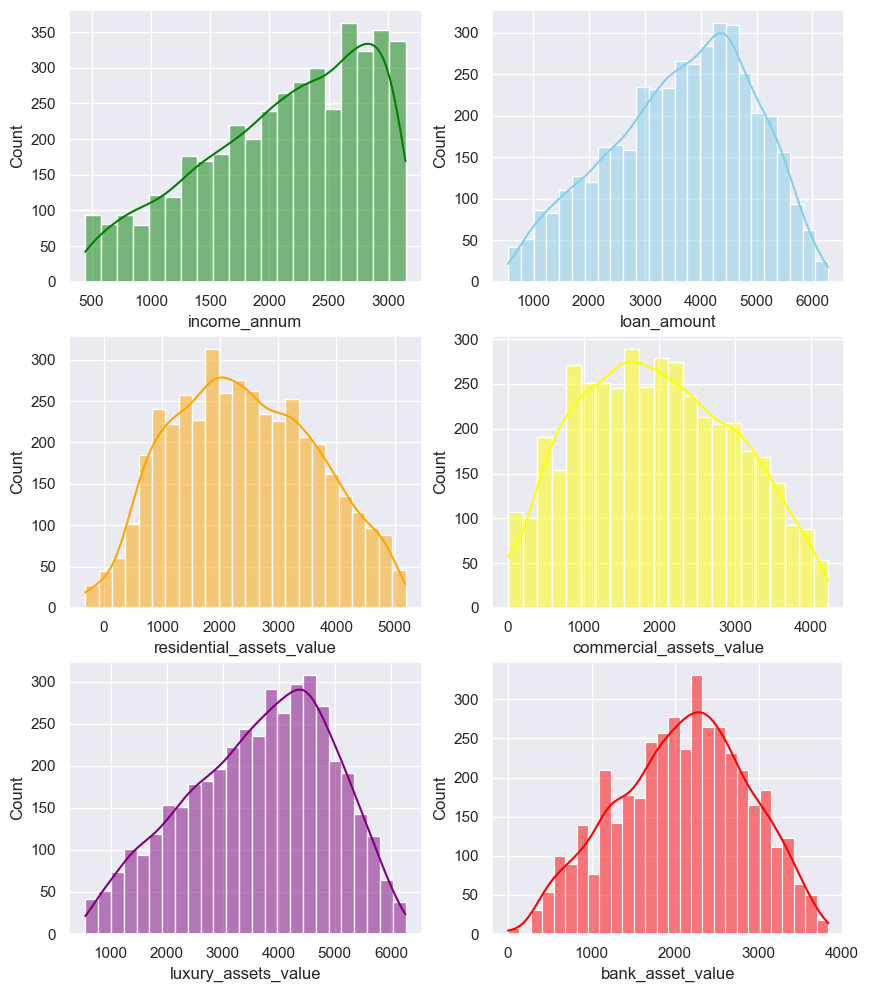

In [26]:
# Histogram distribution of numerical values after log transformation - visible improvement of the distribution

sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

sns.histplot(data=clean_data, x="income_annum", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=clean_data, x="loan_amount", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=clean_data, x="residential_assets_value", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=clean_data, x="commercial_assets_value", kde=True, ax=axs[1, 1], color='yellow')
sns.histplot(data=clean_data, x="luxury_assets_value", kde=True, ax=axs[2, 0], color='purple')
sns.histplot(data=clean_data, x="bank_asset_value", kde=True, ax=axs[2, 1], color='red')

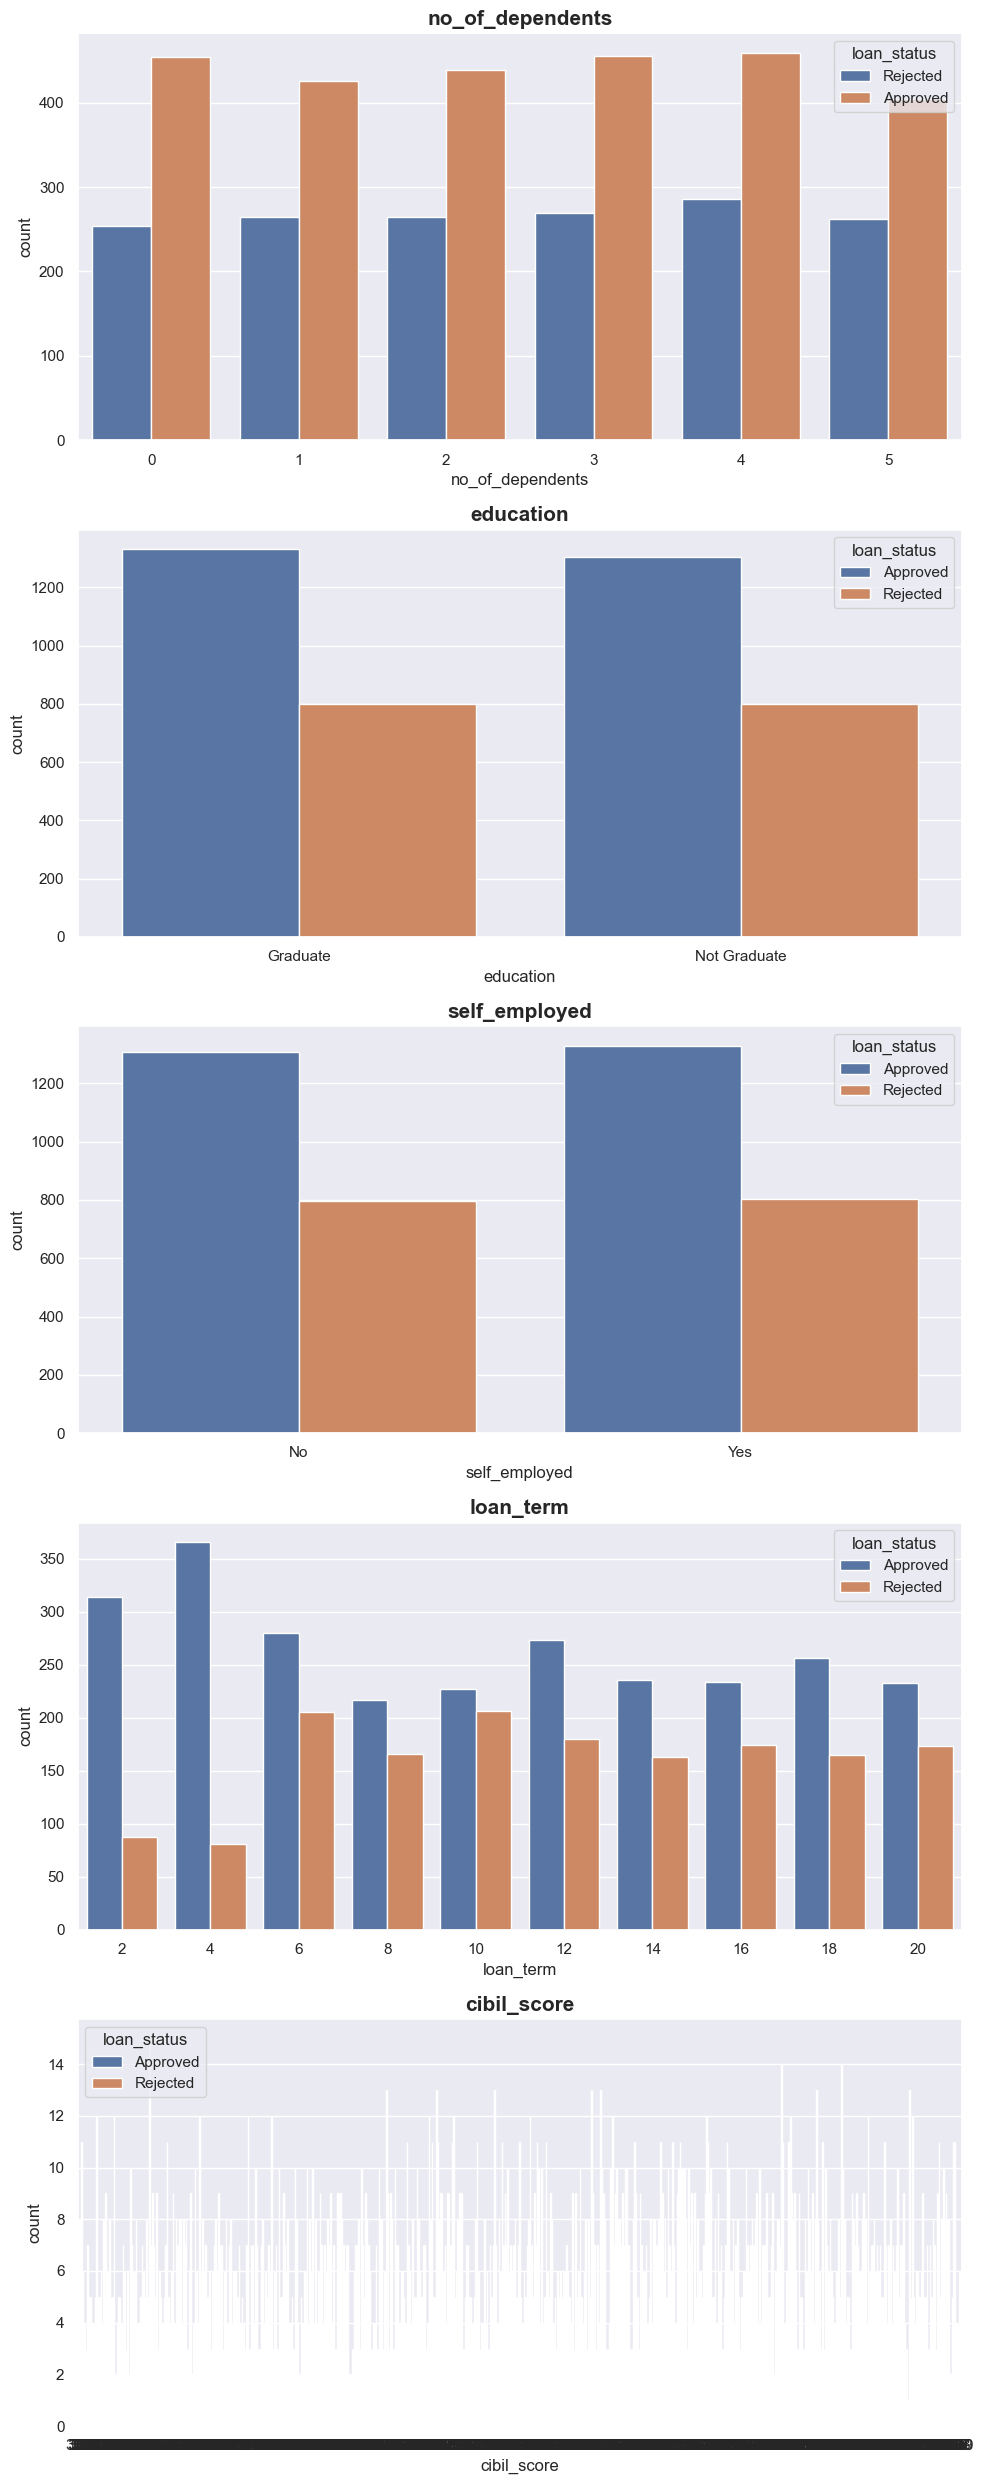

In [27]:
# List of categorical features to plot

cat_features = ["no_of_dependents", "education", "self_employed", "loan_term", "cibil_score"]


n_rows = len(cat_features) 

fig, axs = plt.subplots(n_rows, 1, figsize=(10, 5 * n_rows))  

for i, feature in enumerate(cat_features):
 
    ax = axs[i]  

   
    sns.countplot(data=clean_data, x=feature, hue='loan_status', ax=ax)
    ax.set_title(feature, fontsize=15, fontweight='bold')


plt.tight_layout()
plt.show()

In [28]:
# Generating the cross-tabulation table. 

children = pd.crosstab(clean_data['no_of_dependents'], clean_data['loan_status'])
children

loan_status,Approved,Rejected
no_of_dependents,,
0,454,254
1,425,264
2,439,265
3,455,269
4,459,286
5,404,262


<Axes: xlabel='no_of_dependents'>

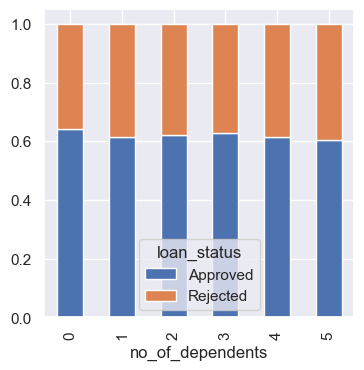

In [29]:
children.div(children.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [30]:
# Generating the cross-tabulation table. 

self_employed = pd.crosstab(clean_data['self_employed'], clean_data['loan_status'])
self_employed

loan_status,Approved,Rejected
self_employed,,
No,1307,796
Yes,1329,804


<Axes: xlabel='self_employed'>

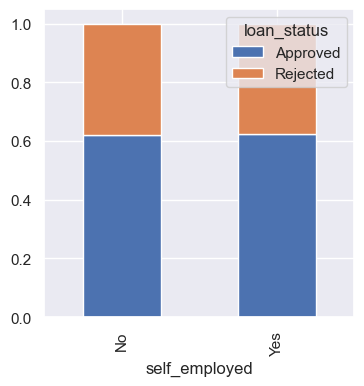

In [31]:
self_employed.div(self_employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [32]:
# Generating the cross-tabulation table. 

education = pd.crosstab(clean_data['education'], clean_data['loan_status'])
education

loan_status,Approved,Rejected
education,,
Graduate,1331,801
Not Graduate,1305,799


<Axes: xlabel='education'>

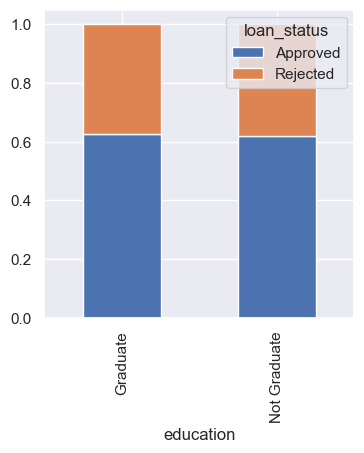

In [33]:
education.div(education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [34]:
# Generating the cross-tabulation table. 

loan_term = pd.crosstab(clean_data['loan_term'], clean_data['loan_status'])
loan_term

loan_status,Approved,Rejected
loan_term,,
2,314,87
4,366,81
6,280,205
8,217,166
10,227,206
12,273,180
14,236,163
16,234,174
18,256,165


<Axes: xlabel='loan_term'>

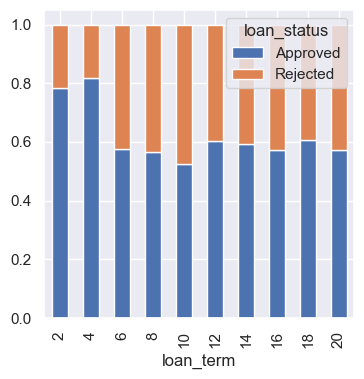

In [35]:
loan_term.div(loan_term.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [36]:
# Generating the cross-tabulation table. As discussed earlier the number of cibil-scores is quite high.

cibil_score = pd.crosstab(clean_data['cibil_score'], clean_data['loan_status'])
cibil_score

loan_status,Approved,Rejected
cibil_score,,
300,3,8
301,0,8
302,2,11
303,0,6
304,3,4
...,...,...
896,11,0
897,4,0
898,4,0


In [37]:
# What I am going to do next is to create bins for cibil_score column and create a new column in our dataframe called cibil_score_bins.
# It will give way much better view of the loan_status vs cibil_score relationship


bins = range(0, 1100, 100)  # Bins from 0 to 900 with a step of 100
labels = [f'{i}-{i+99}' for i in bins[:-1]]

# Create a new column in the DataFrame for the binned cibil scores
clean_data['cibil_score_bins'] = pd.cut(clean_data['cibil_score'], bins=bins, labels=labels, right=False)

clean_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_score_bins
0,2,Graduate,No,3098.386677,5468.089246,12,778,1549.193338,4195.235393,4764.451700,2828.427125,Approved,700-799
1,0,Not Graduate,Yes,2024.845673,3492.849839,8,417,1643.167673,1483.239697,2966.479395,1816.590212,Rejected,400-499
2,3,Graduate,No,3016.620626,5449.770637,20,506,2664.582519,2121.320344,5770.615219,3577.708764,Rejected,500-599
3,3,Graduate,No,2863.564213,5540.758071,8,467,4266.145802,1816.590212,4827.007354,2810.693865,Rejected,400-499
4,5,Not Graduate,Yes,3130.495168,4919.349550,20,382,3521.363372,2863.564213,5422.176685,2236.067977,Rejected,300-399


In [38]:
# Now I generate the cross-tabulation table
cibil_score_bins = pd.crosstab(clean_data['cibil_score_bins'], clean_data['loan_status'])

cibil_score_bins

loan_status,Approved,Rejected
cibil_score_bins,,
300-399,71,626
400-499,76,614
500-599,380,349
600-699,696,4
700-799,727,4
800-899,680,3
900-999,6,0


<Axes: xlabel='cibil_score_bins'>

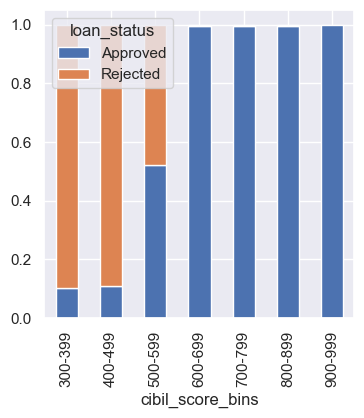

In [39]:
cibil_score_bins.div(cibil_score_bins.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

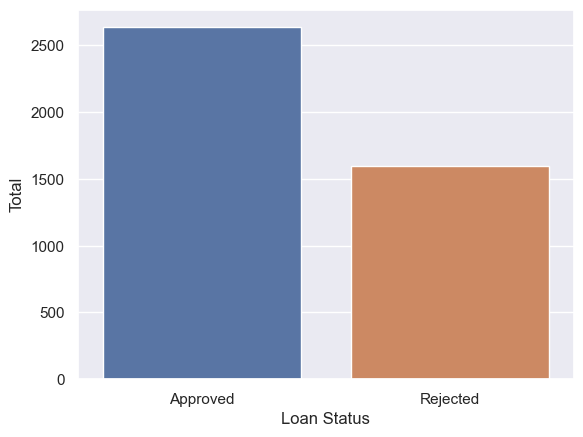

In [40]:
# Plotting 'loan_status' count between approved and rejected

sns.countplot(x='loan_status', hue='loan_status', data=clean_data, palette="deep", dodge=False, legend=False)
plt.ylabel('Total')
plt.xlabel('Loan Status')
plt.show()

In [41]:
# Calculate the percentage of each class

class_percentage = clean_data['loan_status'].value_counts(normalize=True) * 100
class_percentage

loan_status
Approved    62.228517
Rejected    37.771483
Name: proportion, dtype: float64

In [42]:
# We can see that the data is not balanced, rejections shows only 37% of the entire dataset. 
# We need to balance loan status variable to avoid the situation where our model is going to be biased.
# We can use Smote technique (Synthetic Minority Over-sampling Technique) to oversample the dataframe to avoice overfitting.
# However, before we do this we need to change all our categorical values with the object type to float.
# The easiest way is to create dummy variables for categorical values.

In [43]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4236 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   no_of_dependents          4236 non-null   int64   
 1   education                 4236 non-null   object  
 2   self_employed             4236 non-null   object  
 3   income_annum              4236 non-null   float64 
 4   loan_amount               4236 non-null   float64 
 5   loan_term                 4236 non-null   int64   
 6   cibil_score               4236 non-null   int64   
 7   residential_assets_value  4236 non-null   float64 
 8   commercial_assets_value   4236 non-null   float64 
 9   luxury_assets_value       4236 non-null   float64 
 10  bank_asset_value          4236 non-null   float64 
 11  loan_status               4236 non-null   object  
 12  cibil_score_bins          4236 non-null   category
dtypes: category(1), float64(6), int64(3), object(3)
memor

In [44]:
# Since we replaced cibil_score with cibil_score_bins, we can delete cibil_score column

new_data = clean_data.drop(["cibil_score"], axis = 1)

In [45]:
# Noew we are changing the data type for loan_status, where 1 - approved, 0 - rejected

new_data['loan_status'] = np.where(new_data['loan_status'] == "Approved", 1, 0)

In [46]:
new_data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_score_bins
0,2,Graduate,No,3098.386677,5468.089246,12,1549.193338,4195.235393,4764.451700,2828.427125,1,700-799
1,0,Not Graduate,Yes,2024.845673,3492.849839,8,1643.167673,1483.239697,2966.479395,1816.590212,0,400-499
2,3,Graduate,No,3016.620626,5449.770637,20,2664.582519,2121.320344,5770.615219,3577.708764,0,500-599
3,3,Graduate,No,2863.564213,5540.758071,8,4266.145802,1816.590212,4827.007354,2810.693865,0,400-499
4,5,Not Graduate,Yes,3130.495168,4919.349550,20,3521.363372,2863.564213,5422.176685,2236.067977,0,300-399
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000.000000,1516.575089,12,1673.320053,707.106781,1816.590212,894.427191,0,300-399
4265,0,Not Graduate,Yes,1816.590212,3361.547263,20,2049.390153,1702.938637,3316.624790,1378.404875,1,500-599
4266,2,Not Graduate,No,2549.509757,4888.762625,18,1095.445115,3521.363372,4254.409477,2701.851217,0,400-499
4267,1,Not Graduate,No,2024.845673,3577.708764,8,2863.564213,836.660027,3754.996671,2408.318916,1,700-799


In [47]:
# Creating dummy variables and dropping the first variable to avoid multicollinearity

dependents_dummies = pd.get_dummies(new_data['no_of_dependents'], prefix='depend', drop_first=True).astype(int)
education_dummies = pd.get_dummies(new_data['education'], prefix='edu', drop_first=True).astype(int)
employement_dummies = pd.get_dummies(new_data['self_employed'], prefix='emp', drop_first=True).astype(int)
loan_term_dummies = pd.get_dummies(new_data['loan_term'], prefix='l_term', drop_first=True).astype(int)
cibil_dummies = pd.get_dummies(new_data['cibil_score_bins'], prefix='cibil', drop_first=True).astype(int)


In [48]:
# Removing original columns from our data and replacing with dummy columns instead

dummy_data = new_data.drop(['no_of_dependents', 'education', 'self_employed', 'loan_term', 'cibil_score_bins'], axis=1)

In [49]:
# Replacing original values with dummy values

dummy_data = pd.concat([dummy_data,dependents_dummies, education_dummies, employement_dummies, loan_term_dummies, cibil_dummies], axis=1)
dummy_data.head()

,income_annum,loan_amount,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,depend_1,depend_2,depend_3,...,l_term_20,cibil_100-199,cibil_200-299,cibil_300-399,cibil_400-499,cibil_500-599,cibil_600-699,cibil_700-799,cibil_800-899,cibil_900-999
0,3098.386677,5468.089246,1549.193338,4195.235393,4764.451700,2828.427125,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2024.845673,3492.849839,1643.167673,1483.239697,2966.479395,1816.590212,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3016.620626,5449.770637,2664.582519,2121.320344,5770.615219,3577.708764,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,2863.564213,5540.758071,4266.145802,1816.590212,4827.007354,2810.693865,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,3130.495168,4919.349550,3521.363372,2863.564213,5422.176685,2236.067977,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [50]:
# Looking at the dataframe I relaised there are two columns cibil_100-199 and cibil_200-299. 
# If you remember the describe table for cibil_score the minimum score was 300.
# Thus we can remove cibil_100-199 and cibil_200-299

dummy_data = dummy_data.drop(['cibil_100-199', 'cibil_200-299'], axis=1)


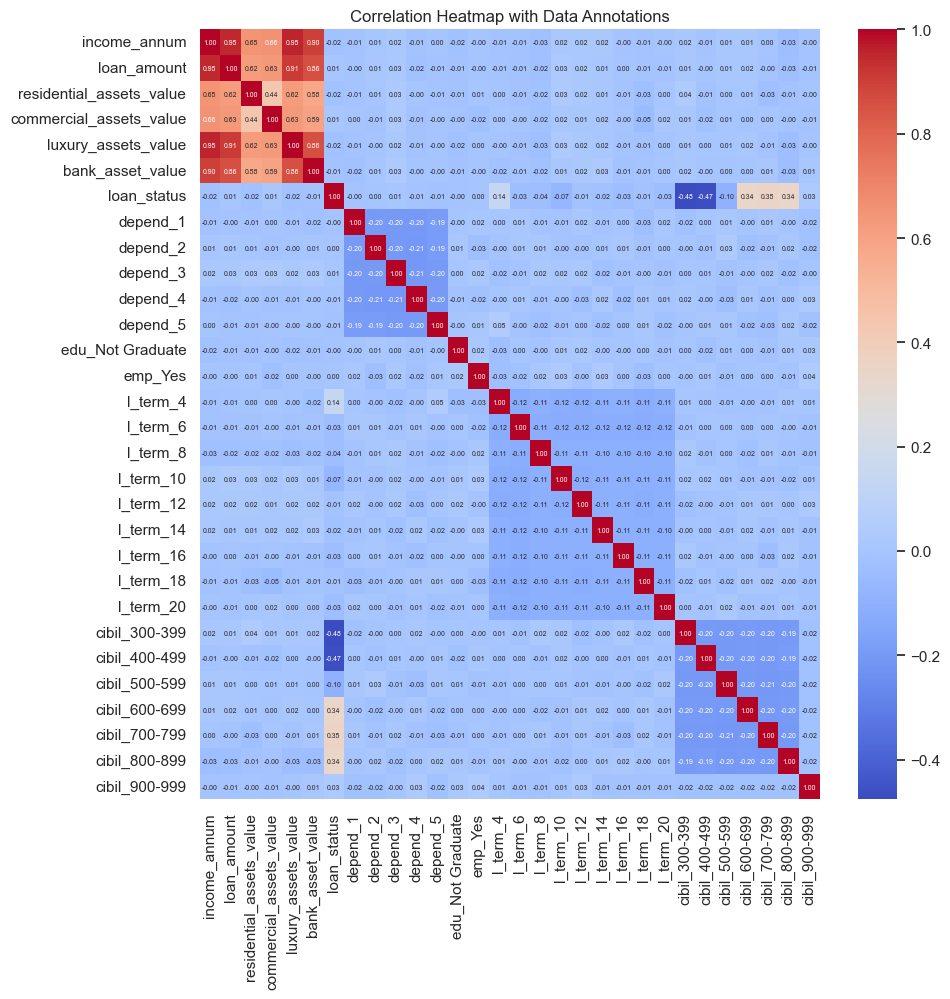

In [51]:
# Building a correlation heatmap

corr_matrix = dummy_data.corr()


plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 5})
plt.title('Correlation Heatmap with Data Annotations')
plt.show()


# We can see a strong correlation between some of the fetures, e.g. annual income and loan amount. 
# This makes sense since the higher the income the larger loan people can afford.
# Or, the higher the income the more assets they have.
# Even though there is a strong correlation between some of the features, we will leave them in the model, since they all impact the loan aproval decision

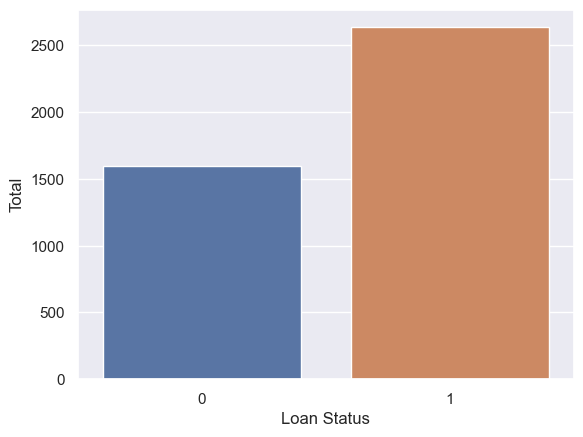

In [52]:
# Plotting 'loan_status' again cto make sure nothing has changed after we intriduced dummies into our dataframe


sns.countplot(x='loan_status', hue='loan_status', data=dummy_data, palette="deep", dodge=False, legend=False)
plt.ylabel('Total')
plt.xlabel('Loan Status')
plt.show()

In [53]:
# We're retuning back to our Smote technique to (Synthetic Minority Over-sampling Technique) to oversample the dataframe to avoice overfitting

X = dummy_data.drop(["loan_status"], axis=1)

y = dummy_data["loan_status"]


In [54]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)

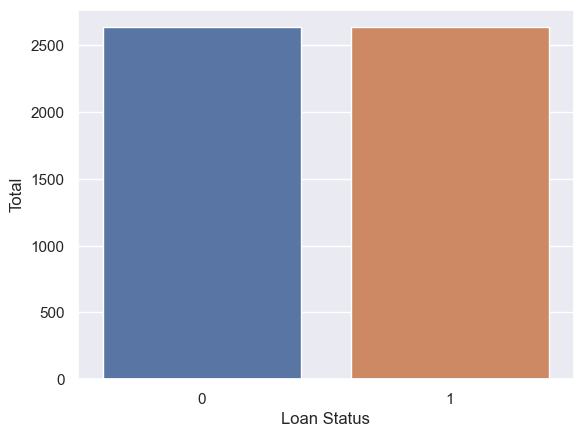

In [55]:
# Now we can see both approved and rejected are equal, disctributions is balanced, so we can proceed with the models

sns.countplot(x=y, hue = y, data=dummy_data, palette="deep",dodge=False, legend=False)
plt.ylabel('Total')
plt.xlabel('Loan Status')
plt.show()

In [56]:
# Data Preporation ofr ML implementation

In [57]:
# Data normalisation. Our models are going to benefit from feature scaling because they involve optimization or calculations where feature magnitude can materially impact performance
# Mix-Max Scaler is typically necessary for K-Nearest Neighbors (KNN), Support Vector Machines (SVM), Logistic Regression and Gradient Boosting MachinesGradient Boosting Machines ML models
# Let's perform Mix-Max Scaler for our features

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [58]:
# We will build a confusion metrix where:
# TP =  the model correctly predicts that a loan will be approved, and indeed the loan is approved. In practical terms, the model predicted '1' (loan approved) and the actual outcome was also '1' (loan approved).
# FP =  known as a Type I error. It happens when the model incorrectly predicts that a loan will be approved, but actually, the loan is rejected. The model predicted '1' (loan approved), but the actual outcome was '0' (loan rejected). This can lead to potentially extending a loan to an unqualified applicant.
# TN =  the model correctly predicts that a loan will be rejected, and indeed the loan is rejected. In other words, the model predicted '0' (loan rejected) and the actual outcome was '0' (loan rejected).
# FN =  known as a Type II error. This happens when the model incorrectly predicts that a loan will be rejected, but actually, the loan should have been approved. The model predicted '0' (loan rejected), but the actual outcome was '1' (loan approved). This can result in a missed opportunity to extend a loan to a qualified applicant.


In [59]:
# Splitting Data Set and looking ta the test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4217, 29), (1055, 29), (4217,), (1055,))

In [60]:
# Model Implementation
# Logistic Regresstion (LR)

# Logistic regression looks for the relationships between two data factors. 
# It then uses this relationship to predict the value of one of those factors based on the other. 
# the prediction usually has a finite number of outcomes, like yes or no.

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       535
           1       0.95      0.85      0.90       520

    accuracy                           0.91      1055
   macro avg       0.91      0.91      0.91      1055
weighted avg       0.91      0.91      0.91      1055



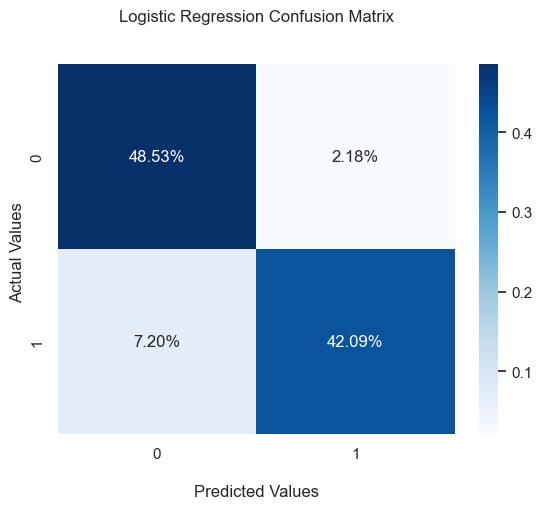

In [62]:
# Logistic Regression Model


LR = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)

# Print metrics
print(classification_report(y_test, y_pred_LR))

# Print Confusion matrix
cf_martix_LR = confusion_matrix(y_test, y_pred_LR)
cf_martix_LR

ax = sns.heatmap(cf_martix_LR/np.sum(cf_martix_LR), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [63]:
# Metrics based on Confusion Matrix Data Lpgistic Regression

LR_Acc_score = round(accuracy_score(y_test,y_pred_LR),3)
LR_Pres_score = round(precision_score(y_test,y_pred_LR),3)
LR_Rec_score = round(recall_score(y_test,y_pred_LR),3)
LR_F_score = round(f1_score(y_test,y_pred_LR),3)

print(f'Accuracy Score : {LR_Acc_score}')
print(f'Precision Score : {LR_Pres_score}')
print(f'Recall Score : {LR_Rec_score}')
print(f'F-Score : {LR_F_score}')


Accuracy Score : 0.906
Precision Score : 0.951
Recall Score : 0.854
F-Score : 0.9


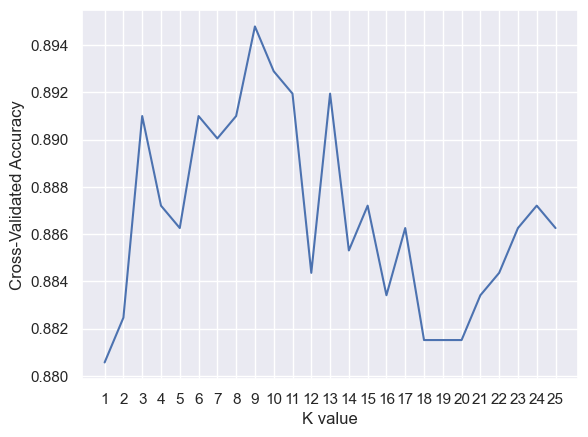

In [64]:
# K-Nearest Neighbors (KNN) is a simple yet powerful algorithm used in both classification and regression problems in machine learning
# the parameter k represents the number of nearest neighbors that the algorithm will consider when making predictions
# For instance, if 𝑘 = 5 and three of the neighbors belong to class A and two to class B, the new data point will be classified as class A
# There isn't an optimal 𝑘 that works for all problems. Selecting the best 𝑘 is critical and often done via model tuning techniques such as cross-validation. 
# Testing various values of 𝑘 helps in identifying the number that works best for achieving the highest accuracy or the least error in specific cases.

# Let's test various values of 𝑘 and find out the best accruary for KNN model

# Exploring k from 1 to 25
neighbors = range(1, 26)  
cv_scores = []

for k in neighbors:
   
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train, y_train)
    cv_scores.append(KNN.score(X_test, y_test))


plt.plot(neighbors, cv_scores)
plt.xticks(np.arange(1,26,1))
plt.xlabel("K value")
plt.ylabel("Cross-Validated Accuracy")
plt.show()


# We can see that k = 3 and k = 10 and k = 13 give us the highest accuracy and we just could choose any of those  k values as a grid method
# We just build a cross-validation plot is a better approach since we are not guessing, but can choose the best parameter

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       535
           1       0.91      0.87      0.89       520

    accuracy                           0.89      1055
   macro avg       0.89      0.89      0.89      1055
weighted avg       0.89      0.89      0.89      1055



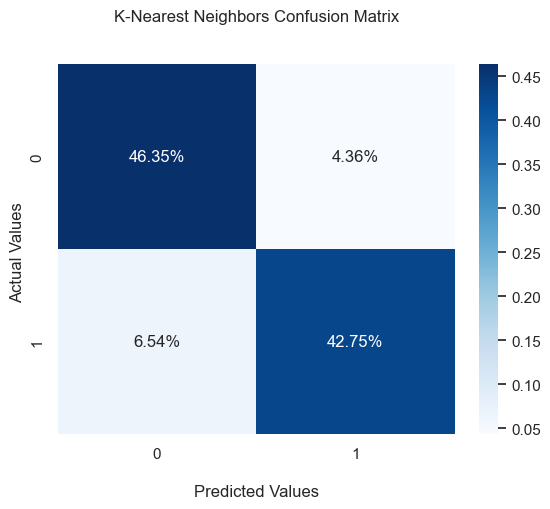

In [65]:
# implementing K-NN algorithm with k value = 5 and looking at stats

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)

# Print metrics
print(classification_report(y_test, y_pred_KNN))

# Print Confusion matrix

cf_martix_KNN = confusion_matrix(y_test, y_pred_KNN)
cf_martix_KNN


ax = sns.heatmap(cf_martix_KNN/np.sum(cf_martix_KNN), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('K-Nearest Neighbors Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



In [66]:
# Metrics based on Confusion Matrix Data K-NN model

KNN_Acc_score = round(accuracy_score(y_test,y_pred_KNN),3)
KNN_Pres_score = round(precision_score(y_test,y_pred_KNN),3)
KNN_Rec_score = round(recall_score(y_test,y_pred_KNN),3)
KNN_F_score = round(f1_score(y_test,y_pred_KNN),3)

print(f'Accuracy Score : {KNN_Acc_score}')
print(f'Precision Score : {KNN_Pres_score}')
print(f'Recall Score : {KNN_Rec_score}')
print(f'F-Score : {KNN_F_score}')


Accuracy Score : 0.891
Precision Score : 0.907
Recall Score : 0.867
F-Score : 0.887


In [67]:
# Support Vector Machine (SVM) works by finding the hyperplane that best separates different classes in the feature space. 
# The goal is to maximize the distance between the nearest data points of any class and the hyperplane, which helps in enhancing the model's generalization abilities.
# Think of SVM as a method for drawing a line in the most effective way to separate two different groups while keeping them as far apart as possible. 


C:\Users\evgen\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.95      0.91       535
           1       0.94      0.86      0.90       520

    accuracy                           0.90      1055
   macro avg       0.91      0.90      0.90      1055
weighted avg       0.91      0.90      0.90      1055



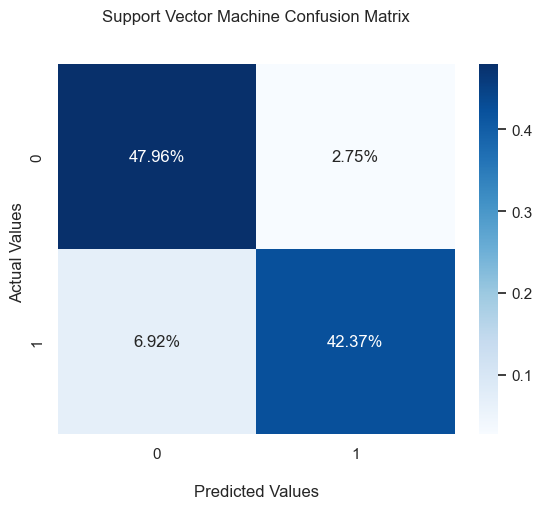

In [68]:
# Support Vector Machine (SVM) Model

SVM = SVC(kernel='rbf', max_iter=500)
SVM.fit(X_train, y_train)

y_pred_SVM = SVM.predict(X_test)

# Print metrics
print(classification_report(y_test, y_pred_SVM))

# Print Confusion matrix

cf_martix_SVM = confusion_matrix(y_test, y_pred_SVM)
cf_martix_SVM


ax = sns.heatmap(cf_martix_SVM/np.sum(cf_martix_SVM), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Support Vector Machine Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [69]:
# Metrics based on Confusion Matrix Data SVM model

SVM_Acc_score = round(accuracy_score(y_test,y_pred_SVM),3)
SVM_Pres_score = round(precision_score(y_test,y_pred_SVM),3)
SVM_Rec_score = round(recall_score(y_test,y_pred_SVM),3)
SVM_F_score = round(f1_score(y_test,y_pred_SVM),3)

print(f'Accuracy Score : {SVM_Acc_score}')
print(f'Precision Score : {SVM_Pres_score}')
print(f'Recall Score : {SVM_Rec_score}')
print(f'F-Score : {SVM_F_score}')


Accuracy Score : 0.903
Precision Score : 0.939
Recall Score : 0.86
F-Score : 0.898


In [70]:
# Random Forest (RF) combines the predictions from multiple machine learning algorithms to make more accurate predictions than any individual model.
# RF builds a large number of decision trees. Each tree in the forest is built from a random sample of the data


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       535
           1       0.94      0.87      0.90       520

    accuracy                           0.91      1055
   macro avg       0.91      0.91      0.91      1055
weighted avg       0.91      0.91      0.91      1055



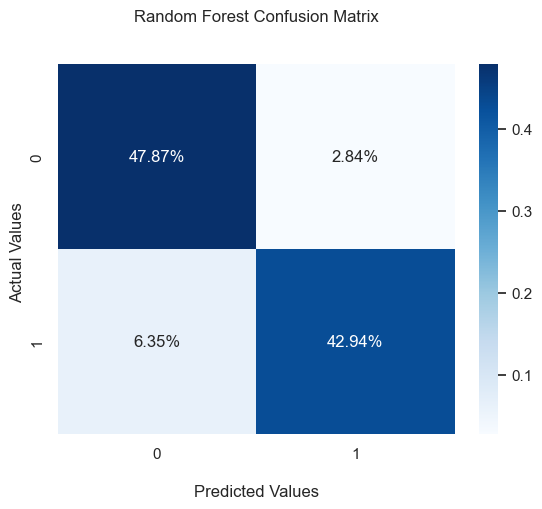

In [71]:
# Random Forest Model


RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)


# Print metrics
print(classification_report(y_test, y_pred_RF))

# Print Confusion matrix

cf_martix_RF = confusion_matrix(y_test, y_pred_RF)
cf_martix_RF


ax = sns.heatmap(cf_martix_RF/np.sum(cf_martix_RF), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Random Forest Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


In [72]:
# Metrics based on Confusion Matrix Data Random Forest Model

RF_Acc_score = round(accuracy_score(y_test,y_pred_RF),3)
RF_Pres_score = round(precision_score(y_test,y_pred_RF),3)
RF_Rec_score = round(recall_score(y_test,y_pred_RF),3)
RF_F_score = round(f1_score(y_test,y_pred_RF),3)

print(f'Accuracy Score : {RF_Acc_score}')
print(f'Precision Score : {RF_Pres_score}')
print(f'Recall Score : {RF_Rec_score}')
print(f'F-Score : {RF_F_score}')


Accuracy Score : 0.908
Precision Score : 0.938
Recall Score : 0.871
F-Score : 0.903


In [73]:
# Hyperparameter tuning - looking for the best poarameters

htrf = RandomForestClassifier(random_state=42)

# Create the parameter grid
param_grid = {
    'n_estimators': [25, 50, 75, 100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=htrf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit grid search
best_model = grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the model
best_accuracy = grid_search.score(X_test, y_test)
print("Best score:", best_accuracy)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


C:\Users\evgen\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.8976303317535546


In [74]:

# Define the model with the best parameters
best_params = {
    'n_estimators': 75,
    'max_depth': 20,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'random_state': 42
}
RFHT = RandomForestClassifier(**best_params)

# Fit the model
RFHT.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = RF.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

C:\Users\evgen\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.9081


C:\Users\evgen\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.87      0.95      0.91       535
           1       0.94      0.86      0.90       520

    accuracy                           0.90      1055
   macro avg       0.90      0.90      0.90      1055
weighted avg       0.90      0.90      0.90      1055



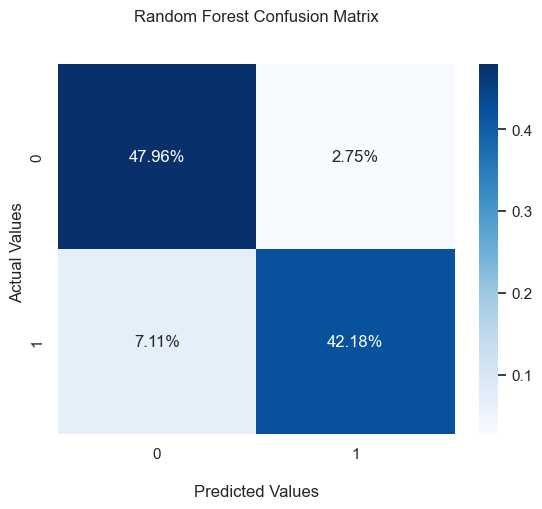

In [75]:
# Random Forest Model with hyperparameter tuning

# Define the model with the best parameters
best_params = {
    'n_estimators': 75,
    'max_depth': 20,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'random_state': 42
}



RFHT = RandomForestClassifier(**best_params)
RFHT.fit(X_train, y_train)

y_pred_RFHT = RFHT.predict(X_test)


# Print metrics
print(classification_report(y_test, y_pred_RFHT))

# Print Confusion matrix

cf_martix_RFHT = confusion_matrix(y_test, y_pred_RFHT)
cf_martix_RFHT


ax = sns.heatmap(cf_martix_RFHT/np.sum(cf_martix_RFHT), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Random Forest with Hyperparameter Tuning Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [76]:
# Metrics based on Confusion Matrix Data Random Forest with hyperparameter tuning


RFHT_Acc_score = round(accuracy_score(y_test,y_pred_RFHT),3)
RFHT_Pres_score = round(precision_score(y_test,y_pred_RFHT),3)
RFHT_Rec_score = round(recall_score(y_test,y_pred_RFHT),3)
RFHT_F_score = round(f1_score(y_test,y_pred_RFHT),3)

print(f'Accuracy Score : {RFHT_Acc_score}')
print(f'Precision Score : {RFHT_Pres_score}')
print(f'Recall Score : {RFHT_Rec_score}')
print(f'F-Score : {RFHT_F_score}')


Accuracy Score : 0.901
Precision Score : 0.939
Recall Score : 0.856
F-Score : 0.895


In [77]:
#  Desicion Tree Model is a course of action model. 
# it visually represents decisions as decision outcomes in the way of Yes or No.
# Very simple algorithms, since no math is involved.

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       535
           1       0.90      0.89      0.89       520

    accuracy                           0.89      1055
   macro avg       0.89      0.89      0.89      1055
weighted avg       0.89      0.89      0.89      1055



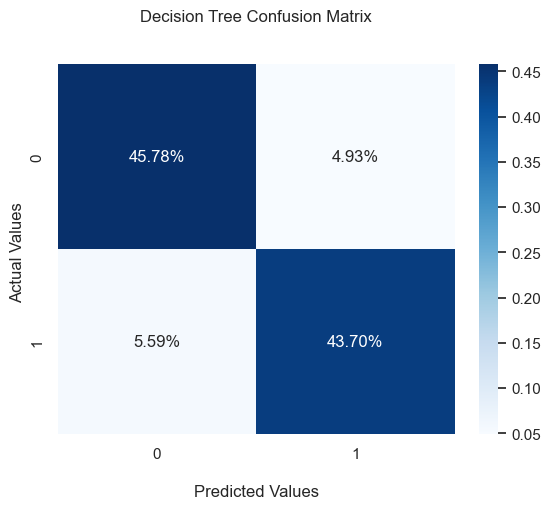

In [78]:
# Decision Tree Classifier Model

DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train,y_train)


y_pred_DTC = DTC.predict(X_test)

# Print metrics

print(classification_report(y_test, y_pred_DTC))

# Print Confusion matrix

cf_martix_DTC = confusion_matrix(y_test, y_pred_DTC)
cf_martix_DTC


ax = sns.heatmap(cf_martix_DTC/np.sum(cf_martix_DTC), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Decision Tree Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



In [79]:
# Metrics based on Confusion Matrix Decision Tree Model


DTC_Acc_score = round(accuracy_score(y_test,y_pred_DTC),3)
DTC_Pres_score = round(precision_score(y_test,y_pred_DTC),3)
DTC_Rec_score = round(recall_score(y_test,y_pred_DTC),3)
DTC_F_score = round(f1_score(y_test,y_pred_DTC),3)

print(f'Accuracy Score : {DTC_Acc_score}')
print(f'Precision Score : {DTC_Pres_score}')
print(f'Recall Score : {DTC_Rec_score}')
print(f'F-Score : {DTC_F_score}')


Accuracy Score : 0.895
Precision Score : 0.899
Recall Score : 0.887
F-Score : 0.893


In [80]:
# Hyperparameter tuning - looking for the best parameters

DT = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
   'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
}

# Setup the grid search
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search
best_modelDT = grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)

best_accuracy = grid_search.score(X_test, y_test)

print("Best score:", best_accuracy)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters: {'max_depth': 20, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best score: 0.9033175355450237


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       535
           1       0.93      0.87      0.90       520

    accuracy                           0.91      1055
   macro avg       0.91      0.90      0.91      1055
weighted avg       0.91      0.91      0.91      1055



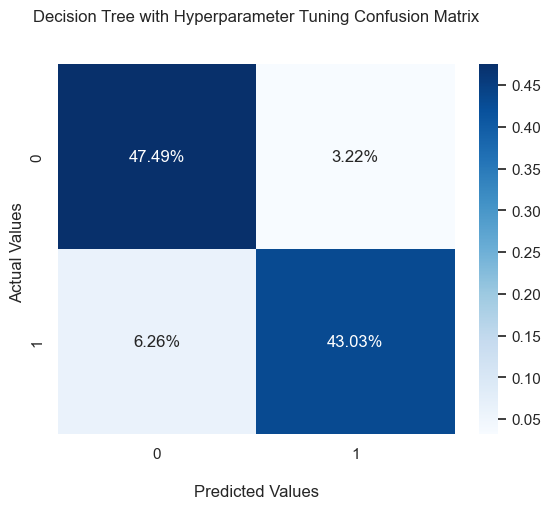

In [81]:
# Decision Tree Classifier Model with hyperparameter tuning

# Define the model with the best parameters
best_params = {
    'max_leaf_nodes': 50,
    'max_depth': None,
    'max_features': None,
    'min_samples_leaf': 5,
    'min_samples_split': 20,
    'random_state': 42
}


DTHT = DecisionTreeClassifier(**best_params)
DTHT = DTHT.fit(X_train,y_train)


y_pred_DTHT = DTHT.predict(X_test)

# Print statistics
print(classification_report(y_test, y_pred_DTHT))

# Print Confusion matrix

cf_martix_DTHT = confusion_matrix(y_test, y_pred_DTHT)
cf_martix_DTHT


ax = sns.heatmap(cf_martix_DTHT/np.sum(cf_martix_DTHT), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Decision Tree with Hyperparameter Tuning Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


In [82]:

# Metrics based on Confusion Matrix Decision Tree Model with hyperparameter tuning

DTHT_Acc_score = round(accuracy_score(y_test,y_pred_DTHT),3)
DTHT_Pres_score = round(precision_score(y_test,y_pred_DTHT),3)
DTHT_Rec_score = round(recall_score(y_test,y_pred_DTHT),3)
DTHT_F_score = round(f1_score(y_test,y_pred_DTHT),3)

print(f'Accuracy Score : {DTHT_Acc_score}')
print(f'Precision Score : {DTHT_Pres_score}')
print(f'Recall Score : {DTHT_Rec_score}')
print(f'F-Score : {DTHT_F_score}')


Accuracy Score : 0.905
Precision Score : 0.93
Recall Score : 0.873
F-Score : 0.901


In [93]:
# XGBoost Model

# gradient boosting decision tree model, which builds a predictive model by combining the predictions of multiple individual models, often decision trees, in an iterative manner.

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       535
           1       0.94      0.88      0.91       520

    accuracy                           0.91      1055
   macro avg       0.91      0.91      0.91      1055
weighted avg       0.91      0.91      0.91      1055



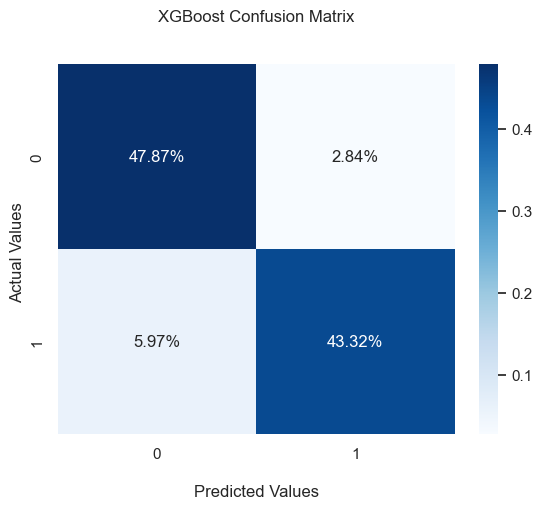

In [84]:
# Implementing XGBClassifier
XGBC = XGBClassifier(use_label_encoder=False)
XGBC.fit(X_train,y_train)
y_pred_XGBC = XGBC.predict(X_test)


# Print statistics
print(classification_report(y_test, y_pred_XGBC))

# Print Confusion matrix

cf_martix_XGBC = confusion_matrix(y_test, y_pred_XGBC)
cf_martix_XGBC


ax = sns.heatmap(cf_martix_XGBC/np.sum(cf_martix_XGBC), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('XGBoost Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [85]:
# Metrics based on Confusion Matrix XGBoost 

XGBC_Acc_score = round(accuracy_score(y_test,y_pred_XGBC),3)
XGBC_Pres_score = round(precision_score(y_test,y_pred_XGBC),3)
XGBC_Rec_score = round(recall_score(y_test,y_pred_XGBC),3)
XGBC_F_score = round(f1_score(y_test,y_pred_XGBC),3)

print(f'Accuracy Score : {XGBC_Acc_score}')
print(f'Precision Score : {XGBC_Pres_score}')
print(f'Recall Score : {XGBC_Rec_score}')
print(f'F-Score : {XGBC_F_score}')


Accuracy Score : 0.912
Precision Score : 0.938
Recall Score : 0.879
F-Score : 0.908


In [86]:
# XGBoost model looking for Hyperparameters. 

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Create the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit grid search
best_model = grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)

best_accuracy = grid_search.score(X_test, y_test)

print("Best score:", best_accuracy)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found:  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Best score: 0.9061611374407583


              precision    recall  f1-score   support

           0       0.89      0.94      0.92       535
           1       0.93      0.88      0.91       520

    accuracy                           0.91      1055
   macro avg       0.91      0.91      0.91      1055
weighted avg       0.91      0.91      0.91      1055



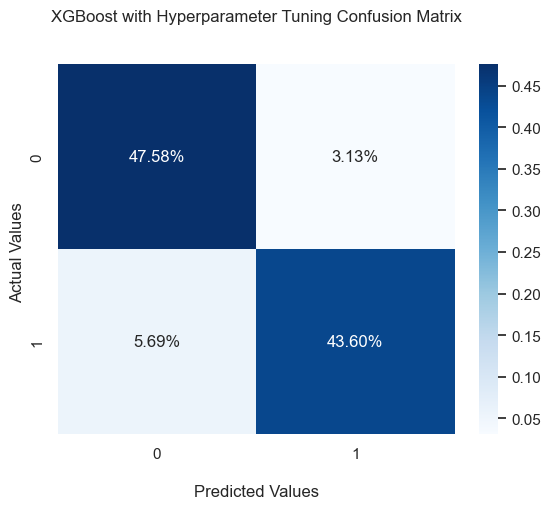

In [87]:
# XGBoost Model with hyperparameter tuning
import xgboost as xgb


# Defined Best Parameters
best_params = {
    'gamma': 0,
    'max_depth': 4,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'subsample': 1.0
   
}


XGBHT = xgb.XGBClassifier(**best_params)
XGBHT = XGBHT.fit(X_train,y_train)


y_pred_XGBHT = XGBHT.predict(X_test)

# Print metrics
print(classification_report(y_test, y_pred_XGBHT))

# Print Confusion matrix

cf_martix_XGBHT = confusion_matrix(y_test, y_pred_XGBHT)
cf_martix_XGBHT


ax = sns.heatmap(cf_martix_XGBHT/np.sum(cf_martix_XGBHT), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('XGBoost with Hyperparameter Tuning Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


In [88]:

# Metrics based on Confusion Matrix XGBoost with Hyperparameter Tuning


XGBHT_Acc_score = round(accuracy_score(y_test,y_pred_XGBHT),3)
XGBHT_Pres_score = round(precision_score(y_test,y_pred_XGBHT),3)
XGBHT_Rec_score = round(recall_score(y_test,y_pred_XGBHT),3)
XGBHT_F_score = round(f1_score(y_test,y_pred_XGBHT),3)


print(f'Accuracy Score : {XGBHT_Acc_score}')
print(f'Precision Score : {XGBHT_Pres_score}')
print(f'Recall Score : {XGBHT_Rec_score}')
print(f'F-Score : {XGBHT_F_score}')



Accuracy Score : 0.912
Precision Score : 0.933
Recall Score : 0.885
F-Score : 0.908


In [89]:
# Comparing Models


model_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'K Neighbors', 'SVM', 'Decision Tree', 
        'Decision Tree with Tuning', 'Random Forest', 
        'Random Forest with Tuning', 'XGBoost', 'XGBoost with Tuning'
    ],
    'Accuracy': [
        LR_Acc_score, KNN_Acc_score, SVM_Acc_score, DTC_Acc_score, DTHT_Acc_score, RF_Acc_score, 
        RFHT_Acc_score, XGBC_Acc_score, XGBHT_Acc_score
    ],
    'Precision Score': [
        LR_Pres_score, KNN_Pres_score, SVM_Pres_score, DTC_Pres_score, DTHT_Pres_score, RF_Pres_score, 
        RFHT_Pres_score, XGBC_Pres_score, XGBHT_Pres_score
    ],
    'Recall Score': [
        LR_Rec_score, KNN_Rec_score, SVM_Rec_score, DTC_Rec_score, DTHT_Rec_score, RF_Rec_score, 
        RFHT_Rec_score, XGBC_Rec_score, XGBHT_Rec_score
    ],
    'F1 Score': [
        LR_F_score, KNN_F_score, SVM_F_score, DTC_F_score, DTHT_F_score, RF_F_score, 
        RFHT_F_score, XGBC_F_score, XGBHT_F_score
    ]
})

compare_sorted = model_comparison.sort_values(by='Accuracy', ascending=False)
compare_sorted

,Model,Accuracy,Precision Score,Recall Score,F1 Score
7,XGBoost,0.912,0.938,0.879,0.908
8,XGBoost with Tuning,0.912,0.933,0.885,0.908
5,Random Forest,0.908,0.938,0.871,0.903
0,Logistic Regression,0.906,0.951,0.854,0.900
4,Decision Tree with Tuning,0.905,0.930,0.873,0.901
2,SVM,0.903,0.939,0.860,0.898
6,Random Forest with Tuning,0.901,0.939,0.856,0.895
3,Decision Tree,0.895,0.899,0.887,0.893
1,K Neighbors,0.891,0.907,0.867,0.887


In [91]:
compare_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 7 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            9 non-null      object 
 1   Accuracy         9 non-null      float64
 2   Precision Score  9 non-null      float64
 3   Recall Score     9 non-null      float64
 4   F1 Score         9 non-null      float64
dtypes: float64(4), object(1)
memory usage: 432.0+ bytes


In [92]:
# Looking for the highest coefficiants in each category


for column in ['Accuracy', 'Precision Score', 'Recall Score', 'F1 Score']:
    max_value = model_comparison[column].max()
    max_model = model_comparison[model_comparison[column] == max_value]['Model'].values[0]
    print(f"Max {column}: {max_value} (Model: {max_model})")

Max Accuracy: 0.912 (Model: XGBoost)
Max Precision Score: 0.951 (Model: Logistic Regression)
Max Recall Score: 0.887 (Model: Decision Tree)
Max F1 Score: 0.908 (Model: XGBoost)


In [ ]:
# Thus we can make a desicion that the best model is XGBoost